# Домашнее задание №1
Курс: Advanced Machine Learning

Студент: Темур Холматов

## Задание 1

События, которые мы имеем:

$A$ - событие, что человек - убийца

$B$ - событие, что у человека редкая группа крови

$P(B)=0.01$ - вероятность иметь редкую группу крови среди населения

$P(B|A)=1$ - вероятность, что у убийцы редкая группа крови

Для того, чтобы найти $P(A|B)$ не хватает только знать $P(A)$ - вероятность быть убийцей и равна она по сути $\frac{1}{N}$, где $N$ - # людей в населении (сверху единица, потомучто убийца один).

На самом деле, не совсем ясно каким образом прокурор вычислил 1%. Однако, если предполагать, что он использовал теорему Байеса, можно сделать вывод, что прокурор посчитал $N$ и вычислил $P(A)$.

Далее вычисления, которые он мог совершить.

$P(\bar{A}|B)=\frac{P(B|\bar{A})P(\bar{A})}{P(B)}=0.01$

$P(B|\bar{A})P(\bar{A})+P(B|A)P(A)=P(B)  =>  P(B|\bar{A})=\frac{P(B)-P(A)}{P(\bar{A})}$ 

Из этого следует: $P(\bar{A}|B)=\frac{P(B)-P(A)}{P(B)}=0.01  =>  P(A)=0.0099$

Подставив, $P(A)$ в формулу Байеса вместе с остальными известными, мы реально получаем 0.99, что совпадает с высказываением прокурора. Однако!!! При $P(A)=0.0099$, $N=101.(01)$, что очень настораживает. Во первых, потомучто число дробное, а такого не должно быть. Во-вторых, маловато число населения, что и смутило адвоката.

## Задание 2

Наконец, мы получаем хоть какую-то информацию о кол-ве людей. Адвокат строго соблюдает теорему Байеса и использует формулу верно. Однако!!! Раз уж мы на суде, то давайте придираться к словам: `число людей `**в городе**` == число населения??` Если, ответ да, то к товарищу адвокату нет притензий. Иначе, ему стоило бы пересчитать $P(B)$ с учетом кол-ва людей населения, которые живут в этом городе. Иными словами, мы имеем:

$P(B)=P(B|C)P(C)+P(B|\bar{C})P(\bar{C})$, где $С$ - событие, что человек живет в этом городе.

Из этой формулы мы можем посчитать $P(B|C)$ - вероятность иметь редкую группу крови в этом городе - и заменить ею $P(B)$, так как $P(A) - вероятность в рамках города, а не населения$:

$P(B|C)=\frac{P(B)-P(B|\bar{C})P(\bar{C})}{P(C)}$

И у нас появляются новые неизвестные переменные, которые нужно найти. Все же было бы хорошо, если прокурор и адвокат изначально использовали # населения.

## Задание 3

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 10

In [26]:
## если data = 1, тест положительный
## вычисления записаны через test_failure значения, а не через test_success
def compute_posterior(data, prior_prob=0.01, test_failures={'FP':0.05, 'FN':0.0}):
    if data == 1:
        return (prior_prob * (1 - test_failures['FP'])) / (prior_prob * (1 - test_failures['FP']) + (1-prior_prob) * test_failures['FP'])
    elif data == 0:
        return (prior_prob * test_failures['FN']) / (prior_prob * test_failures['FN'] + (1-prior_prob) * (1 - test_failures['FN']))
    else:
        return None


vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0.01, 0.31, 0.01)
alphas = np.arange(0.5, 1.1, 0.1)  # используется для прозрачности линий

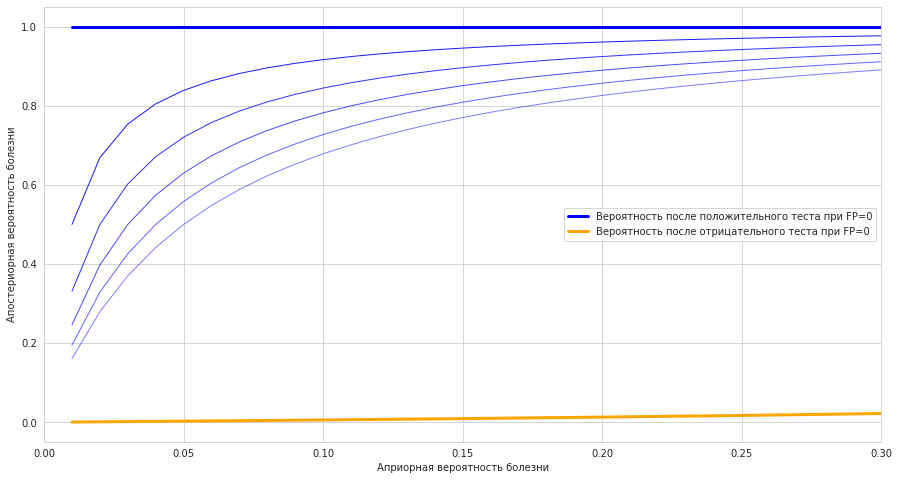

In [23]:
# Варируем FP значение (когда тест выдаёт позитивный результат у здорового человека)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
for fp, alpha in zip(np.arange(0.05, -0.01, -0.01), alphas):
    
    ys_one = vector_posterior(1, prior_prob=xs, test_failures={'FP':fp, 'FN':0.05})
    ys_zero = vector_posterior(0, prior_prob=xs, test_failures={'FP':fp, 'FN':0.05})

    if fp < 0.005:
        ax.plot(xs, ys_one, linewidth=3, label='Вероятность после положительного теста при FP=0', color='blue')
        ax.plot(xs, ys_zero, linewidth=3, label='Вероятность после отрицательного теста при FP=0', color='orange')
    else:
        ax.plot(xs, ys_one, linewidth=1, alpha=alpha, color='blue')
        ax.plot(xs, ys_zero, linewidth=1, alpha=alpha, color='orange')

ax.set_xlim((0.0, 0.3))
ax.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
ax.set_ylabel('Апостериорная вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

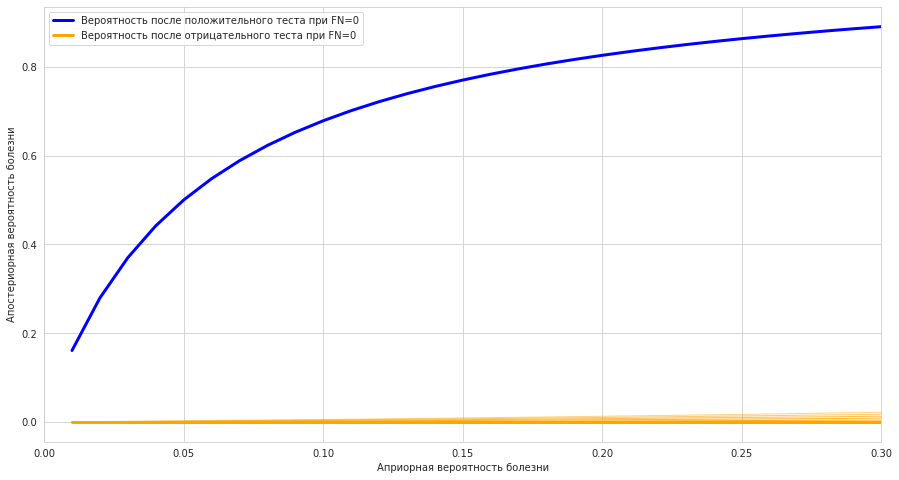

In [25]:
# Варируем FN (когда тест выдаёт отрицательный результат у больного)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
for fn, alpha in zip(np.arange(0.05, -0.01, -0.01), alphas):
    
    ys_one = vector_posterior(1, prior_prob=xs, test_failures={'FP':0.05, 'FN':fn})
    ys_zero = vector_posterior(0, prior_prob=xs, test_failures={'FP':0.05, 'FN':fn})

    if fn < 0.005:
        ax.plot(xs, ys_one, linewidth=3, label='Вероятность после положительного теста при FN=0', color='blue')
        ax.plot(xs, ys_zero, linewidth=3, label='Вероятность после отрицательного теста при FN=0', color='orange')
    else:
        ax.plot(xs, ys_one, linewidth=1, alpha=alpha, color='blue')
        ax.plot(xs, ys_zero, linewidth=1, alpha=alpha, color='orange')

ax.set_xlim((0.0, 0.3))
ax.set_xlabel('Априорная вероятность болезни', fontsize=legend_fontsize)
ax.set_ylabel('Апостериорная вероятность болезни', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()

**Выводы:**
- с уменьшением false positive, апостериорная вероятность болезни при положительном тесте увеличивается, а при отрицательном тесте остается такой же
- с уменьшением false negative, апостериорная вероятность болезни при положительном тесте остается на месте, а вот при отрицательном тесте уменьшается
- далее для того, чтобы принять решение стоило бы обратить внимание на другие факторы, такие как уровень смертности от болезни и уровень заразности
- если уменьшить кол-во False Negative случаев, можно будет избежать случаев, когда мы можем отпустить человека, который в реальности болен, в дальнейшем у него могут быть осложнения или он может заразить других людей. Однако, стоит учитывать, что вероятность таких случаев и так мала, и понизить ее можно будет очень несущественно.
- с другой стороны, если уменьшить кол-во False Positive случаев, это может хорошо сказаться на системе здравоохранения, ибо уменьшить кол-во пациентов, которых нужно будет помещать в карантин в больницах. Более того, апостериорная вероятность болезни после положительного теста растет более существенно и поэтому эффект ожидается более заметный.